In [109]:
import os
from os.path import exists, join, dirname, basename

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
from PIL import Image # for creating a gif of head contours


In [127]:
doc_dir = os.getcwd()
while basename(doc_dir) != 'Documents':
    doc_dir = dirname(doc_dir)
    
# dir of all gwfm data
gwfm_dir = os.path.dirname(doc_dir)+'/Box/research_cosumnes/GWFlowModel'
# dir of stream level data for seepage study
proj_dir = gwfm_dir + '/Oneto_Denier/'

hob_dir = join(gwfm_dir, 'HOB_data')
sfr_dir = gwfm_dir+'/SFR_data/'

py_dir = doc_dir +'GitHub/CosumnesRiverRecharge/python_utilities/'



In [ ]:
strt_date = pd.to_datetime('2012-10-1')
end_date = pd.to_datetime('2020-9-30')

In [6]:
df = pd.read_csv(join(hob_dir,'CosumnesRiverPreserve_MW_screened_interval.csv'))
rm_sp = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude,df.Latitude), crs='epsg:4326')
rm_sp = rm_sp.to_crs('epsg:32610')
rm_sp = rm_sp.rename(columns={'Well ID':'Sensor'})

# prepare output for modelgrid join
rm_t = rm_sp[rm_sp['At Oneto-Denier']=='Yes'].copy()

rm_t[['top_screen','bot_screen']] = rm_t['Screened Interval (ft)'].str.split('-',n=2, expand=True).astype(float)
# calculate elevation from screened interval depth
rm_t['top_screen_m'] = rm_t['MPE (meters)'] - rm_t.top_screen*0.3048
rm_t['bot_screen_m'] = rm_t['MPE (meters)'] - rm_t.bot_screen*0.3048


In [4]:
# load field data
gwl = pd.read_csv(join(hob_dir,'AllSets.csv'), parse_dates=['dt'], index_col=['dt'], dtype=object)
gwl.index = gwl.index.tz_localize(None)
gwl = gwl.apply(lambda x: pd.to_numeric(x, errors='coerce'))
# filter for wells within the grid
gwl = gwl.loc[:,gwl.columns.isin(rm_t.Sensor.values)]
# filter for dates within the period

# taking daily average only changes maximum/minimum values by 0.01-0.3
# np.max(np.abs(gwl.resample('D').mean().min()- gwl.min())), np.max(np.abs(gwl.resample('D').mean().max()- gwl.max()))
# gwl_D = gwl_dates.resample('D').mean()

# # long format to prepare for identifier
# gwl_long = gwl_D.melt(ignore_index=False, var_name='Well',value_name='obs')
# # drop NAs
# gwl_long = gwl_long.dropna(subset=['obs'])

NameError: name 'rm_t' is not defined

In [187]:
strt_date = pd.to_datetime('2012-10-1')
end_date = pd.to_datetime('2020-9-30')
fig_dir = 'figures/long_timeseries'

strt_date = pd.to_datetime('2016-9-1')
end_date = pd.to_datetime('2017-9-30')
fig_dir = 'figures/short_timeseries'


In [188]:
gwl_dates = gwl.loc[strt_date:end_date]

plt_data = gwl_dates['MW_11'].dropna()
# plt_data.plot(marker='.',linestyle='')
day = plt_data.resample('D').mean()
week = plt_data.resample('W').mean()
week.index += pd.DateOffset(days=-3.5)

monthly = plt_data.resample('MS').mean()
monthly.index += np.round((monthly.index.days_in_month/2),0).values.astype('timedelta64[D]')

biannual = monthly[monthly.index.month.isin([10,4])]

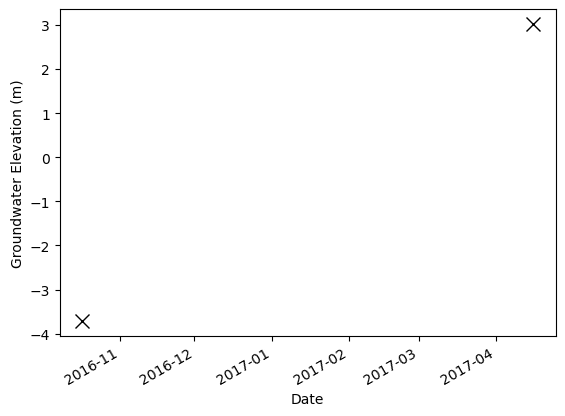

In [189]:
biannual.plot(marker='x',linestyle='', color='black', markersize=10, label='Biannual')
plt.xlabel('Date')
plt.ylabel('Groundwater Elevation (m)')
plt.savefig(join(fig_dir,'01_biannual.png'), bbox_inches='tight')


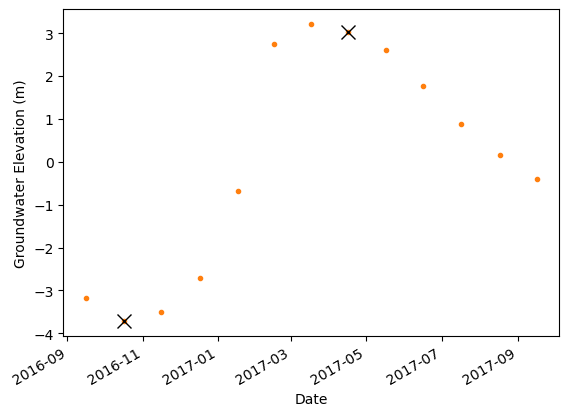

In [190]:
monthly.plot(marker='.',linestyle='', color='tab:orange', label='Monthly')
biannual.plot(marker='x',linestyle='', color='black', markersize=10, label='Biannual')
plt.xlabel('Date')
plt.ylabel('Groundwater Elevation (m)')
plt.savefig(join(fig_dir,'02_monthly.png'), bbox_inches='tight')


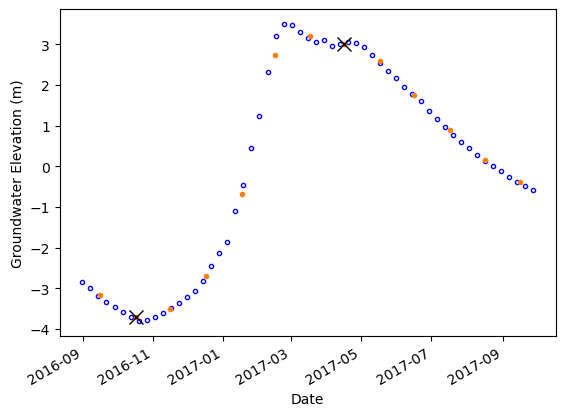

In [191]:
week.plot(marker='o',linestyle='', color='blue', markerfacecolor='none', markersize=3, label='Weekly')
monthly.plot(marker='.',linestyle='', color='tab:orange', label='Monthly')
biannual.plot(marker='x',linestyle='', color='black', markersize=10, label='Biannual')
plt.xlabel('Date')
plt.ylabel('Groundwater Elevation (m)')
plt.savefig(join(fig_dir,'03_weekly.png'), bbox_inches='tight')


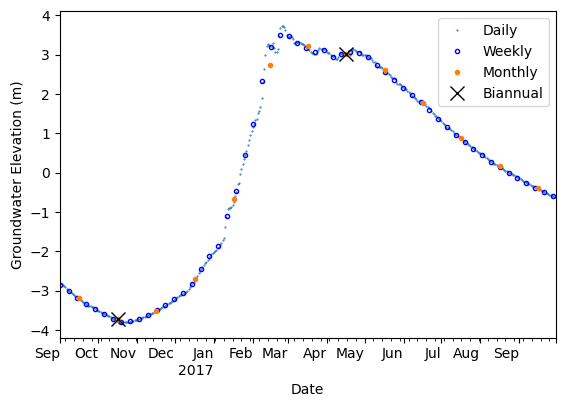

In [192]:
day.plot(marker='.',linestyle='', markersize=1, label='Daily')
week.plot(marker='o',linestyle='', color='blue', markerfacecolor='none', markersize=3, label='Weekly')
monthly.plot(marker='.',linestyle='', color='tab:orange', label='Monthly')
biannual.plot(marker='x',linestyle='', color='black', markersize=10, label='Biannual')
plt.xlabel('Date')
plt.ylabel('Groundwater Elevation (m)')
plt.legend()

plt.savefig(join(fig_dir,'04_all.png'), bbox_inches='tight')
